In [2]:
#Import Packages
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, KFold
import joblib
import matplotlib.pyplot as plt

In [3]:
#Import Data
churn=pd.read_csv('/Users/elineiman/Desktop/WGU Data Sets/D603/churn_clean.csv')

In [28]:
churn.to_csv('churn.csv', index=False)

<font size="4"> D1: Data Preprocessing </font>

The goal of data preprocessing is to ensure the variables are ready for the random forest model to use. The analysis will use categorical variables. These must be converted into numeric form to pass into the model as inputs. Machine learning models cannot use categorical variables, so they must be converted to meaningful numbers or binary columns. 

I will preprocess the categorical variables with one hot encoding. One hot encoding creates a new column for each category of the categorical variable. Each row contains a true in the column the record belongs to, and a false where it does not. I will also preprocess the data by examining data types, and searching for missing values. This will put the data in the best position to train the model accurately.


<font size="4"> D2: Dataset Variables </font>

State: Categorical variable

Population: Continuous variable

Children: Continuous variable

Age: Continuous variable

Income: Continuous variable

Marital: Categorical variable

Churn: Categorical variable. The dependent variable

Outage_sec_perweek: Continuous variable

Contacts: Continuous variable

Yearly_equip_failure: Continuous variable

Contract: Categorical variable

Port_modem: Categorical variable

Tablet: Categorical variable

InternetService: Categorical variable

Phone: Categorical variable

Multiple: Categorical variable

OnlineSecurity: Categorical variable

OnlineBackup: Categorical variable

DeviceProtection: Categorical variable

TechSupport: Categorical variable

StreamingTV: Categorical variable

StreamingMovies: Categorical variable

PaperlessBilling: Categorical variable

Tenure: Continuous variable

MonthlyCharge: Continuous variable

Bandwidth_GB_Year: Continuous variable

<font size="4"> D3: Explanation </font>

In [4]:
churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

I began preprocessing the data by dropping the columns I did not select as model inputs. I used the drop function, and set axis=1 to refer to the columns.

In [5]:
churn.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 
            'City', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Gender', 
            'Email', 'Techie', 'PaymentMethod', 'Item1', 'Item2', 'Item3',
            'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [6]:
#Confirm Changes
churn.columns

Index(['State', 'Population', 'Children', 'Age', 'Income', 'Marital', 'Churn',
       'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

I then checked for null values, and identified that the ‘InternetService’ column had 2,129 missing values. I used the value_counts function to uncover only two categories in the Internet Service variable. The data dictionary states that ‘none’ is also an option, so I assigned all the null values to the ‘none’ category.

In [7]:
churn.isna().sum()

State                      0
Population                 0
Children                   0
Age                        0
Income                     0
Marital                    0
Churn                      0
Outage_sec_perweek         0
Contacts                   0
Yearly_equip_failure       0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
Tenure                     0
MonthlyCharge              0
Bandwidth_GB_Year          0
dtype: int64

In [8]:
churn.InternetService.value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [9]:
churn['InternetService'].fillna("none", inplace=True)

In [10]:
churn.InternetService.value_counts()

InternetService
Fiber Optic    4408
DSL            3463
none           2129
Name: count, dtype: int64

Next, I inspected the data types for each variable I included. The data types were accurate, so I did not make any changes.

In [11]:
print(churn.dtypes)

State                    object
Population                int64
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Churn                    object
Outage_sec_perweek      float64
Contacts                  int64
Yearly_equip_failure      int64
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object


The next step was to encode the categorical variables. Encoding converts categorical variables into numeric or binary columns, which the machine learning model can use for analysis. I used the pd.get_dummies function to one hot encode 15 categorical variables.

In [12]:
churn= pd.get_dummies(churn, columns=['State','Marital','Contract','Port_modem','Tablet','InternetService', 'Phone','Multiple',
                                      'OnlineSecurity','OnlineBackup' ,'DeviceProtection','TechSupport', 'StreamingTV', 
                                      'StreamingMovies', 'PaperlessBilling'],drop_first=True)

I then examined the data type of the encoded columns and identified that they were converted as booleans. I converted them to integer columns so the random forest model could use them.

In [13]:
churn.dtypes

Population                int64
Children                  int64
Age                       int64
Income                  float64
Churn                    object
                         ...   
DeviceProtection_Yes       bool
TechSupport_Yes            bool
StreamingTV_Yes            bool
StreamingMovies_Yes        bool
PaperlessBilling_Yes       bool
Length: 81, dtype: object

In [14]:
bool_cols = churn.select_dtypes(include='bool').columns
churn[bool_cols] = churn[bool_cols].astype(int)
churn.dtypes

Population                int64
Children                  int64
Age                       int64
Income                  float64
Churn                    object
                         ...   
DeviceProtection_Yes      int64
TechSupport_Yes           int64
StreamingTV_Yes           int64
StreamingMovies_Yes       int64
PaperlessBilling_Yes      int64
Length: 81, dtype: object

The last step in the data preprocessing was to examine the multicollinearity between the variables I had selected. Utilizing my code from D600 task 1 as a reference, I ran a VIF test to identify variables with close associations. Multicollinearity can lead to model overfitting. It is necessary to eliminate variables with VIF scores greater than 10 (GeeksForGeeks).

In [15]:
VIF=churn.drop(['Churn'], axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]
vif_data=vif_data.sort_values('VIF', ascending=False)

In [16]:
print(vif_data.head(5))

                        feature           VIF
9             Bandwidth_GB_Year  10114.303145
7                        Tenure   7898.345366
8                 MonthlyCharge    627.212311
69  InternetService_Fiber Optic     71.205778
2                           Age     27.256798


There were multiple variables with VIF scores above 10. I removed the variables with the highest VIF scores, then re-ran the VIF test. I repeated this process three times until no variables had a VIF score above 10.


In [17]:
churn.drop(['Bandwidth_GB_Year', 'Tenure', 'MonthlyCharge', 'InternetService_Fiber Optic', 'Age'], axis=1, inplace=True)

In [18]:
VIF2= churn.drop(['Churn'], axis=1)

vif_data2 = pd.DataFrame()
vif_data2["feature"] = VIF2.columns
vif_data2["VIF"] = [variance_inflation_factor(VIF2.values, i) for i in range(VIF2.shape[1])]
vif_data2=vif_data2.sort_values('VIF', ascending=False)

In [19]:
print(vif_data2.head(5))

               feature        VIF
3   Outage_sec_perweek  11.502765
66           Phone_Yes  10.170639
2               Income   2.975032
49            State_TX   2.875416
39            State_NY   2.709061


In [20]:
churn.drop(['Phone_Yes', 'Outage_sec_perweek'], axis=1, inplace=True)

In [21]:
VIF3= churn.drop(['Churn'], axis=1)

vif_data3 = pd.DataFrame()
vif_data3["feature"] = VIF3.columns
vif_data3["VIF"] = [variance_inflation_factor(VIF3.values, i) for i in range(VIF3.shape[1])]
vif_data3=vif_data3.sort_values('VIF', ascending=False)

In [22]:
print(vif_data3.head(5))

                 feature       VIF
2                 Income  2.971568
72  PaperlessBilling_Yes  2.417037
3               Contacts  2.015516
48              State_TX  2.002513
70       StreamingTV_Yes  1.968232


D4: Cleaned Dataset

In [23]:
#churn.to_csv('Churn_D4.csv', index=False)

<font size='4'> E: Data Analysis </font>

E1: Splitting the Data

60% training, 20% testing, 20% validation

In [24]:
y=churn['Churn']
X=churn.drop('Churn', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)


In [25]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6000, 73)
(2000, 73)
(2000, 73)


In [26]:
#Concatenate X's with y's for submission
train_set=pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
val_set=pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1)
test_set= pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)


In [27]:
#Output 3 sets to CSV
#train_set.to_csv('training_set.csv', index=False)
#test_set.to_csv('testing_set.csv', index=False)
#val_set.to_csv('validation_set.csv', index=False)

E2: Initial Model Creation

Random Forest Classificaiton Model

In [62]:
#Instantiate Model
rf = RandomForestClassifier(random_state=13)
#Fit Model
rf.fit(X_train, y_train)
#Predict
y_pred=rf.predict(X_test)

#Accuracy Metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("=== Accuracy ===")
print(f"{accuracy:.4f}")
y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba), 4)
print("=== ROC AUC Score ===")
print(roc_auc)


=== Classification Report ===
              precision    recall  f1-score   support

          No       0.79      0.95      0.86      1459
         Yes       0.70      0.31      0.43       541

    accuracy                           0.78      2000
   macro avg       0.74      0.63      0.64      2000
weighted avg       0.76      0.78      0.74      2000

=== Confusion Matrix ===
[[1387   72]
 [ 375  166]]
=== Accuracy ===
0.7765
=== ROC AUC Score ===
0.7955


<font size="4"> Feature Importance </font>


Prior to Hyperparameter tuning, I will analyze feature importance with the goal of removing unimportant features.

In [63]:
importances=rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

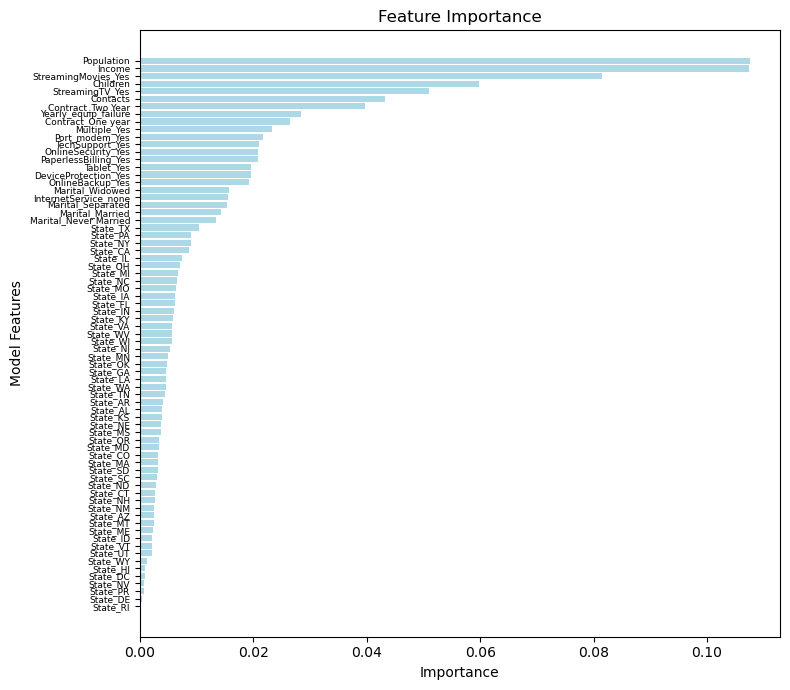

In [64]:
plt.figure(figsize=(8, 7))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Model Features')
plt.yticks(fontsize=6.5)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [65]:
low_importance=importance_df[importance_df['Importance'] < 0.01 ]
low_importance

,Feature,Importance
44,State_RI,0.000257
12,State_DE,0.000467
43,State_PR,0.000799
37,State_NV,0.000818
11,State_DC,0.000841
15,State_HI,0.000909
55,State_WY,0.001318
49,State_UT,0.002101
51,State_VT,0.002105
17,State_ID,0.002123


In [66]:
#Going to drop all state columns due to low importance.
features_to_drop = [col for col in churn.columns if 'State_' in col]
churn.drop(columns=features_to_drop, inplace=True)
churn.shape

(10000, 23)

Since I've dropped columns, I need to re-define the variables and the test, train, val sets.

In [67]:
y=churn['Churn']
X=churn.drop('Churn', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)

In [68]:
#Confirm Changes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6000, 22)
(2000, 22)
(2000, 22)


E3: Hyperparameter Tuning

In [69]:
#Define Hypyerparameters

n_estimators = [100, 200, 500, 1000]
max_depth = [10, 20, 30, 40, 50, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2,]
bootstrap = [True, False]

#Create hyperparameter grid for randomized search
param_grid = {'n_estimators': n_estimators,  
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
              }

param_grid

{'n_estimators': [100, 200, 500, 1000],
 'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [70]:
#Instantiate Kfold cross validation
kf=KFold(n_splits=5, shuffle=True, random_state=13)

In [71]:
#Randomzied Search
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=kf, random_state=13, verbose=2, n_jobs=-1)

#Fit the randomized search model with training data
rf_random.fit(X_val, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total t

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=13, shuffle=True),
                   estimator=RandomForestClassifier(random_state=13),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=13, verbose=2)

In [72]:
#Obtain the best model
best_model=rf_random.best_estimator_

#Hyperparameters
best_params=rf_random.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
#Saving rf_random so I don't need to re-run randomized search
#joblib.dump(rf_random, 'random_forest_model.pkl')

#load:
#rf_random = joblib.load('random_forest_model.pkl')

<font size="4"> E4: Predictions </font>

In [73]:
#Predict on test set
y_test_pred= best_model.predict(X_test)

#Evaluate Accuracy
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print("=== Accuracy ===")
print(f"{accuracy:.4f}")
y_pred_proba5 = best_model.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba5), 4)
print("=== ROC AUC Score ===")
print(roc_auc)

=== Classification Report ===
              precision    recall  f1-score   support

          No       0.79      0.95      0.86      1459
         Yes       0.71      0.30      0.42       541

    accuracy                           0.78      2000
   macro avg       0.75      0.63      0.64      2000
weighted avg       0.77      0.78      0.74      2000

=== Confusion Matrix ===
[[1393   66]
 [ 379  162]]
=== Accuracy ===
0.7775
=== ROC AUC Score ===
0.8085


Most Important Features

In [74]:
importances=best_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(5)

,Feature,Importance
2,Income,0.135769
20,StreamingMovies_Yes,0.134101
0,Population,0.133738
19,StreamingTV_Yes,0.100638
1,Children,0.063967
